In [1]:
%matplotlib ipympl
import numpy as np
from qmsolve import Hamiltonian, SingleParticle, TimeSimulation, init_visualization, femtoseconds, m_e, Å

In [3]:
#=========================================================================================================#
#First, we define the Hamiltonian of a single particle confined in an harmonic oscillator potential. 
#=========================================================================================================#

#interaction potential
def double_slit(particle): 
    """define double slit as as an interactive potential: returns 0 for slit opening and 1 for rest of wall"""
    b = 2.0* Å # slits separation
    a = 0.5* Å # slits width
    d = 0.5* Å # slits depth

    return np.where( ((particle.x < - b/2 - a) | (particle.x > b/2 + a) | ((particle.x > -b/2)  
                     & (particle.x < b/2))) & ((particle.y < d/2) & (particle.y > -d/2) ),  1e5,  0)

#build the Hamiltonian of the system
H = Hamiltonian(particles = SingleParticle(m = m_e), 
                potential = double_slit, 
                spatial_ndim = 2, N = 256, extent = 30 * Å)

#=========================================================================================================#
# Define the wavefunction at t = 0  (initial condition)
#=========================================================================================================#

def initial_wavefunction(particle):
    #This wavefunction correspond to a gaussian wavepacket with a mean Y momentum equal to p_y0
    σ = 1.0 * Å
    v0 = 80 * Å / femtoseconds
    p_y0 = m_e * v0
    return np.exp( -1/(4* σ**2) * ((particle.x-0)**2+(particle.y+8* Å)**2)) / np.sqrt(2*np.pi* σ**2)  *np.exp(p_y0*particle.y*1j)



In [4]:
#=========================================================================================================#
# Set and run the simulation
#=========================================================================================================#


total_time = 0.2 * femtoseconds
sim = TimeSimulation(hamiltonian = H, method = "split-step")
sim.run(initial_wavefunction, total_time = total_time, dt = total_time/8000., store_steps = 800)




Took 149.14500260353088


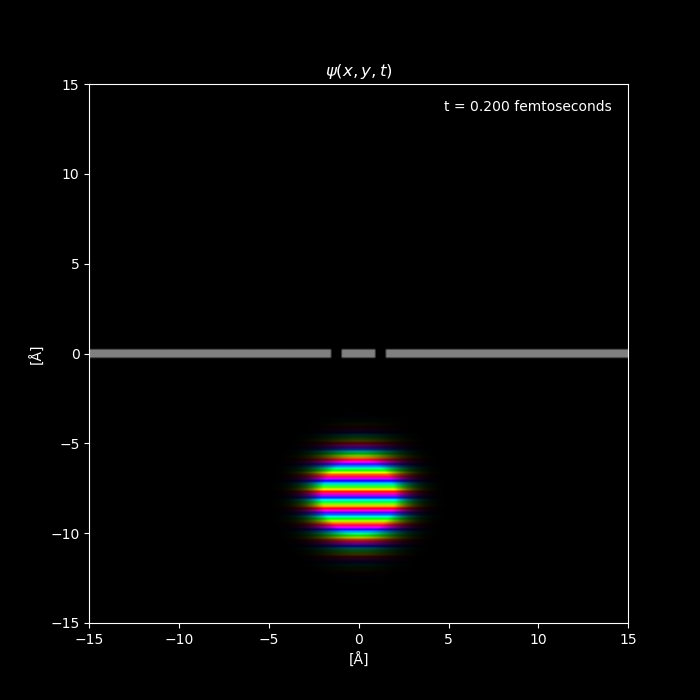

In [5]:
#=========================================================================================================#
# Finally, we visualize the time dependent simulation
#=========================================================================================================#

visualization = init_visualization(sim)

visualization.animate(xlim=[-15* Å,15* Å], ylim=[-15* Å,15* Å], save_animation=True,
                            potential_saturation = 0.5, wavefunction_saturation = 0.2,
                             animation_duration = 10, fps = 30)


In [7]:
# To create a GIF
import os
if os.path.isfile("animation.gif"):
	os.remove("animation.gif")
# For output representing on notebook
import ffmpy
ff = ffmpy.FFmpeg(
	inputs = {"animation.mp4" : None},
	outputs = {"animation.gif" : None})

ff.run()

(None, None)

<img src="animation.gif" width="750" >

In [36]:

# os.remove("animation.mp4")
# os.remove("animation.gif")

Inspired by and referenced from https://github.com/quantum-visualizations/qmsolve/tree/main/qmsolve